In [3]:
# on iris

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
print(X[y==0,2])
print(X[y==0,2].shape)

print(y.shape)

for i,x in enumerate(X):
    print(X[i], ">>" , y[i])
    


[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
(50,)
(150,)
[5.1 3.5 1.4 0.2] >> 0
[4.9 3.  1.4 0.2] >> 0
[4.7 3.2 1.3 0.2] >> 0
[4.6 3.1 1.5 0.2] >> 0
[5.  3.6 1.4 0.2] >> 0
[5.4 3.9 1.7 0.4] >> 0
[4.6 3.4 1.4 0.3] >> 0
[5.  3.4 1.5 0.2] >> 0
[4.4 2.9 1.4 0.2] >> 0
[4.9 3.1 1.5 0.1] >> 0
[5.4 3.7 1.5 0.2] >> 0
[4.8 3.4 1.6 0.2] >> 0
[4.8 3.  1.4 0.1] >> 0
[4.3 3.  1.1 0.1] >> 0
[5.8 4.  1.2 0.2] >> 0
[5.7 4.4 1.5 0.4] >> 0
[5.4 3.9 1.3 0.4] >> 0
[5.1 3.5 1.4 0.3] >> 0
[5.7 3.8 1.7 0.3] >> 0
[5.1 3.8 1.5 0.3] >> 0
[5.4 3.4 1.7 0.2] >> 0
[5.1 3.7 1.5 0.4] >> 0
[4.6 3.6 1.  0.2] >> 0
[5.1 3.3 1.7 0.5] >> 0
[4.8 3.4 1.9 0.2] >> 0
[5.  3.  1.6 0.2] >> 0
[5.  3.4 1.6 0.4] >> 0
[5.2 3.5 1.5 0.2] >> 0
[5.2 3.4 1.4 0.2] >> 0
[4.7 3.2 1.6 0.2] >> 0
[4.8 3.1 1.6 0.2] >> 0
[5.4 3.4 1.5 0.4] >> 0
[5.2 4.1 1.5 0.1] >> 0
[5.5 4.2 1.4 0.2] >> 0
[

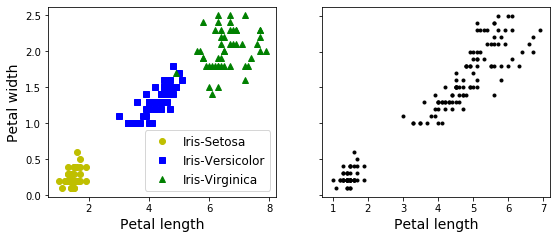

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0,2], X[y==0,3], "yo", label = "Iris-Setosa")
# taking in petal lenght and petal width when y=0 that is iris setosa
plt.plot(X[y==1,2], X[y==1,3],"bs", label = "Iris-Versicolor")
plt.plot(X[y==2,0], X[y==2,3], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2], X[:,3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

# results of classificaiton vs results of clustering

In [25]:
# using a gaussian mizture model to seperate these clusters 
# it also seems to be a non supervised model

from sklearn.mixture import GaussianMixture

In [28]:
import numpy as np

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

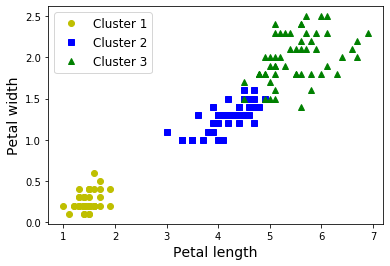

In [29]:
plt.plot(X[y_pred==0,2], X[y_pred==0,3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1,2], X[y_pred==1,3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2,2], X[y_pred==2,3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [30]:
np.sum(y_pred==y)

145

In [31]:
np.sum(y_pred==y)/ len(y_pred)

0.9666666666666667

### K Means

In [32]:
from sklearn.datasets import make_blobs

In [36]:
blob_centers = np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]]
)

blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [37]:
X,y = make_blobs(n_samples=2000, centers=blob_centers,
               cluster_std= blob_std, random_state=7)

In [38]:
## plotting blobs

def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1],c=y, s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


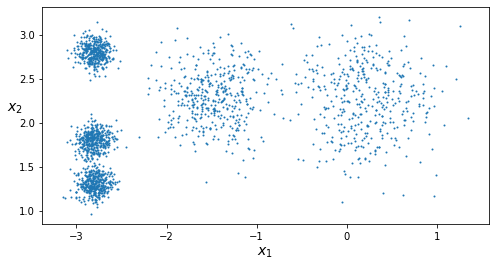

In [39]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

### fit and predict

In [41]:
from sklearn.cluster import KMeans

In [42]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [44]:
y_pred.max() # there are total of five clusters

4

In [45]:
y_pred is kmeans.labels_

True

In [46]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [47]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [48]:
# predicting labels of new instances
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### Decision boundaries

In [49]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights> weights.max() /10]
    plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10,alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=50, linewidths=50,
                color=cross_color,zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # decision boundaries through contour
    plt.contourf(Z, extent=(mins[0],maxs[0], mins[1],maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel("$x_1$",fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        

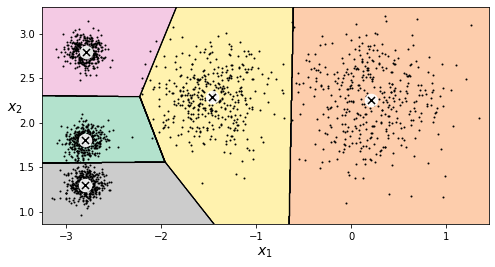

In [50]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

# its called a voronoi diagram

### Hard vs Soft clustering

In [51]:
# Rather than arbitarily choosing the closest cluster for each instance , 
# which is called _hard clustering_, it might be better mwasure the distance ofeach instance to all 5 centroids
# this is what the transform() method does

kmeans.transform(X_new)

# this is the euclidian distnace between each instance and each centroid

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [52]:
# explicitly calculating euclidean distance
np.linalg.norm(np.tile(X_new, (1,k)).reshape(-1,k,2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### K means algorithm

In [54]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=1)

kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=1)

kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

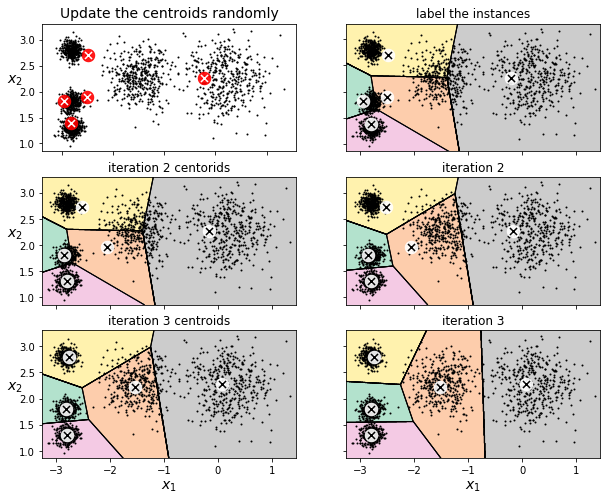

In [58]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids randomly", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X, show_xlabels=False, show_ylabels=False)
plt.title("label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("iteration 2 centorids")

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False )
plt.title("iteration 2")

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("iteration 3 centroids")

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X,show_ylabels=False)
plt.title("iteration 3")

plt.show()

### K means variability

In [59]:
# the problem with originial k means is that there is a lot of variability intrdcued

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10,3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1,X)
    if title1:
        plt.title(title1,fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X,show_ylabels=False)
    
    if title2:
        plt.title(title2, fontsize=14)

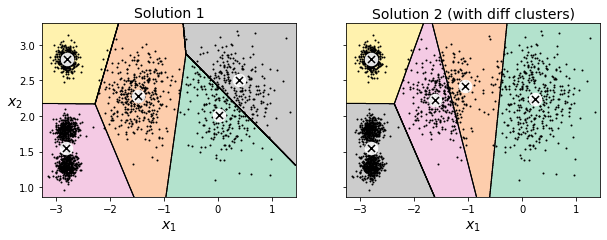

In [61]:
kmeans_end_init1 = KMeans(n_clusters=5,init="random",n_init=1,
                          algorithm="full", random_state=11)
kmeans_end_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_end_init1, kmeans_end_init2, X, "Solution 1", "Solution 2 (with diff clusters)")

plt.show()

### inertia

In [62]:
# to select the best model we need to evaluate tht emodel perofrmance
# inunsepervised model we don't have targets
# bu twe can measuer the distance between each instance and its centroid

kmeans.inertia_

211.5985372581684

In [63]:
# insertia is the sum of squared distances between each training instance and 
# the closest centroid

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [64]:
kmeans.score(X)
# gives a measure of inertia

-211.59853725816856

### Multiple inititalisations 

In [66]:
# wecan run Kmeans multiple times and calculate inertia
# th eone with least inertia is the solution

kmeans_end_init1.inertia_

223.29108572819035

In [67]:
kmeans_end_init2.inertia_

237.46249169442845

In [69]:
# when we set n_init hyperparameter, scikit-Learn runs the original algorithm
# It will run n_init times. default is 10

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random",n_init=10,
                             algorithm="full",random_state=11)

kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

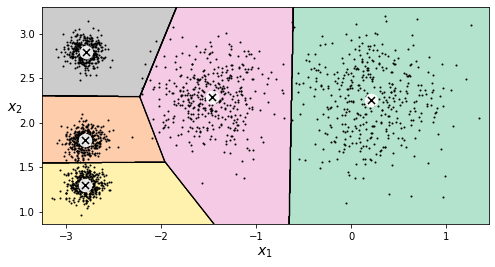

In [70]:
# the optimum value os k =5
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K means ++

In [71]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Accelerated K means

In [73]:
#K means can be accelerated by voiding uneccessary distance calculation
# by taking care of triangle property and lower and upper bounds of distances and centroids
# we just need to set the algorithm="elkan"

%timeit -n 50 KMeans(algorithm="elkan").fit(X)


56 ms ± 898 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [74]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

67.9 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini batch K means

In [76]:
from sklearn.cluster import MiniBatchKMeans

In [77]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [78]:
minibatch_kmeans.inertia_

211.93186531476775

In [80]:
# we use memmap class ifdata does not fit in memory

filename= "my_mnist.data"
m,n = 50000, 28*28
X_mm = np.memmap(filename,dtype="float32", mode="readonly", shape=(m,n))


In [82]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [83]:
# if we can'tuse memap then things are vey complicated

def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [84]:
# now we can train the model by feeding it one batch at atime
np.random.seed(42)

In [87]:
k =5
n_init = 10
n_iterations =100
batch_size = 100
init_size = 500 # more data for K++ initialisation
evaluate_on_last_n_iters =10

best_kmeans =None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
    
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [88]:
best_kmeans.score(X)

-211.63263539769824

In [89]:
# mini bathc kmeans is much faster thean regular K means

%timeit KMeans(n_clusters=5).fit(X)

30.2 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

16.2 ms ± 818 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
# Thats faster but performance is often lower
# higher inertia
# and it keeps degrading as k increases
# lets plot the inertia ratio and the training time ratio between mini batch and regular K means

from timeit import timeit

times = np.empty((100,2))
inertias = np.empty((100,2))
for k in range(1,101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100),end="")
    times[k-1,0] = timeit("kmeans.fit(X)", number=10, globals=globals())
    times[k-1,1] = timeit("minibatch_kmeans.fit(X)",number=10, globals=globals())
    inertias[k-1,0] = kmeans.inertia_
    inertias[k-1,1] = minibatch_kmeans.inertia_

100/100

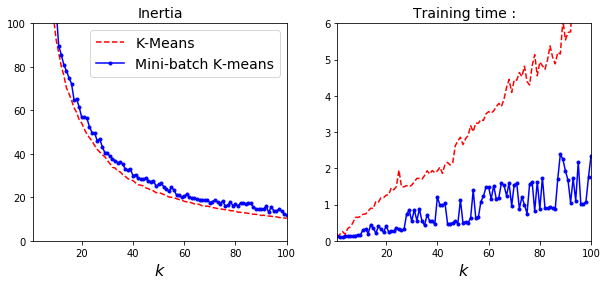

In [95]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(range(1,101), inertias[:,0], "r--", label="K-Means")
plt.plot(range(1,101), inertias[:,1], "b.-", label="Mini-batch K-means")

plt.xlabel("$k$",fontsize=16)

plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1,100,0,100])

plt.subplot(122)
plt.plot(range(1,101), times[:,0],"r--", label="K-Means")
plt.plot(range(1, 101), times[:,1], "b.-", label="Mini-batch K-means")
plt.xlabel("$k$",fontsize=16)

plt.title("Training time :", fontsize=14)
plt.axis([1,100,0,6])

plt.show()